# Importing libraries

In [38]:
# Essential libraries
import pandas as pd
import numpy as np 

#plotting libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#sklearn libraries
from sklearn.model_selection import cross_validate,KFold,train_test_split
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,classification_report, confusion_matrix,ConfusionMatrixDisplay,PrecisionRecallDisplay
from sklearn.pipeline import Pipeline
import pickle
%matplotlib inline

# Importing the dataset

In [2]:
data = pd.read_csv("D:/DEBI/Uottawa/Second term/AI for CS/Assignment 3/Static_dataset.csv")
data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


# Data analysis

## Data distribution

In [3]:
# information about type of data and if there is any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [4]:
#check for counts of missing values
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [5]:
#splitting numerical features form all features
num_data = data.copy()
num_data.drop(["timestamp","longest_word","sld"], axis=1, inplace = True)
num_data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,15,1,1


In [6]:
# Getting all static information on numerical features
num_data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


Distribution of Numerical features graphically

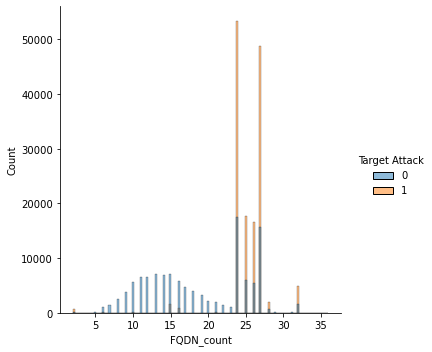

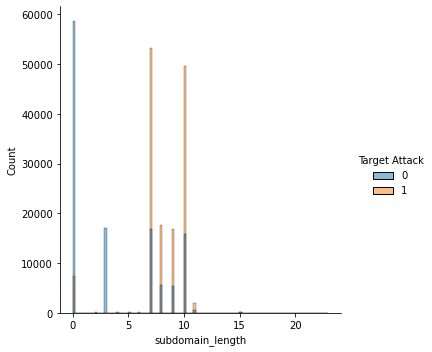

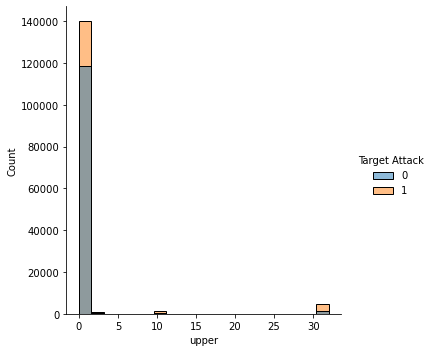

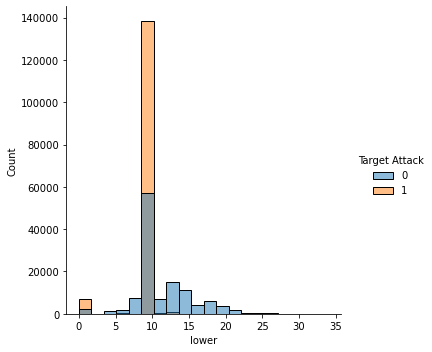

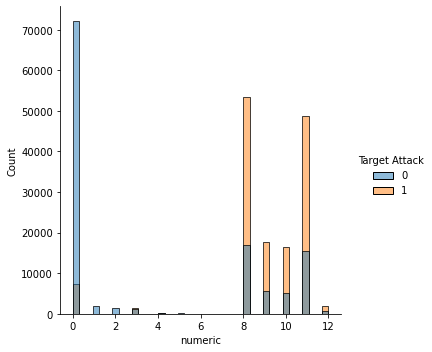

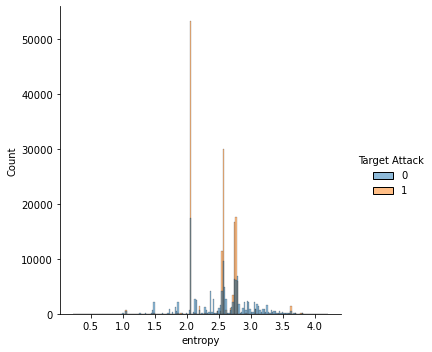

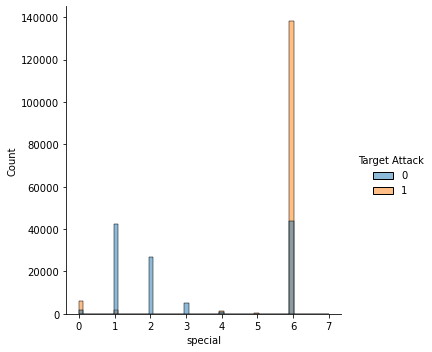

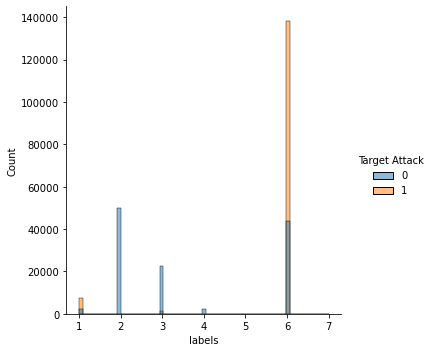

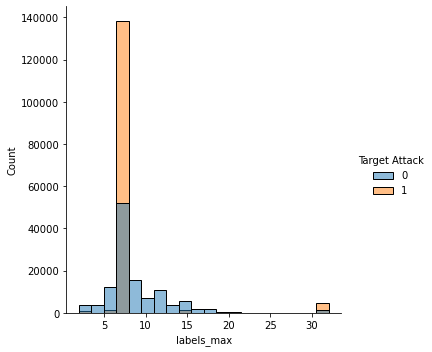

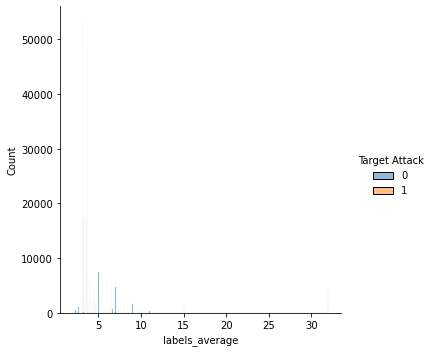

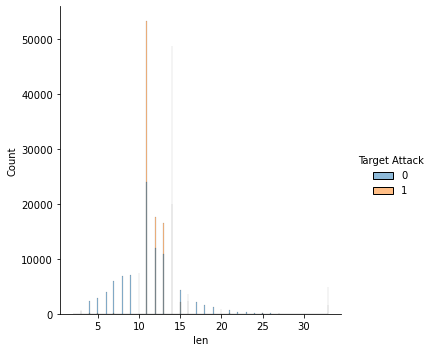

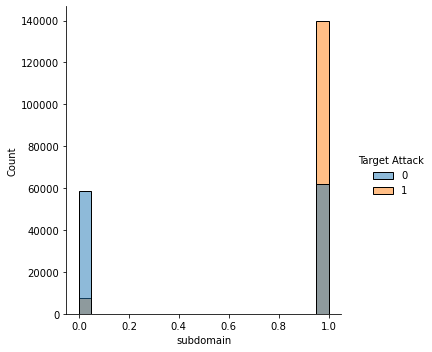

In [7]:
# Distribution of data
for i in range(12):
    sns.displot(num_data, x=num_data.iloc[:,i], hue="Target Attack")
    plt.show()

## Data Skewness

In [8]:
#check for skewness statistically
data.skew()

C:\Users\EGYPT_LAPTOP\AppData\Local\Temp\ipykernel_22504\3674196900.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


FQDN_count         -1.101731
subdomain_length   -0.590480
upper               5.988737
lower               0.343449
numeric            -0.594384
entropy            -0.140156
special            -0.902972
labels             -0.903680
labels_max          3.979910
labels_average      5.087081
len                 2.634801
subdomain          -1.176397
Target Attack      -0.197046
dtype: float64

<AxesSubplot:>

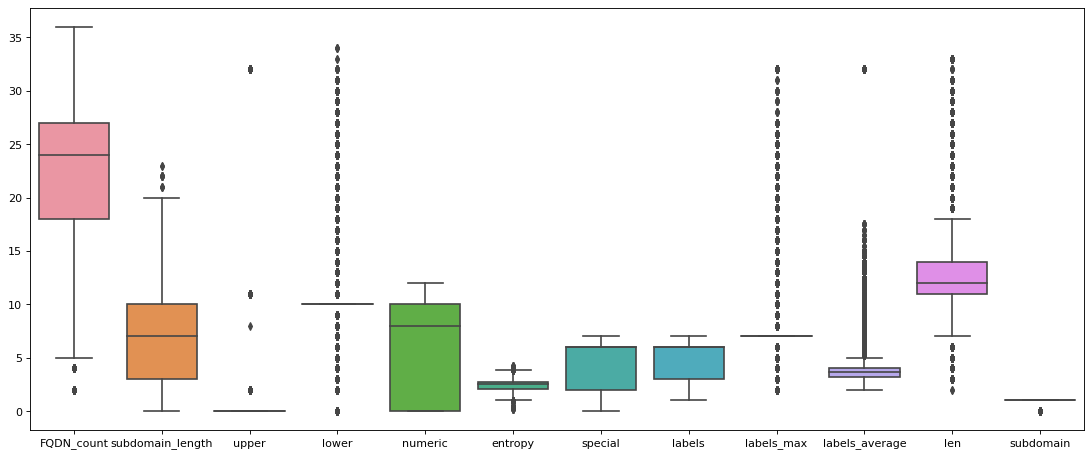

In [9]:
#checking for outliers 
figure(figsize=(17,7), dpi=80)
sns.boxplot(data=data.iloc[:,:-1])

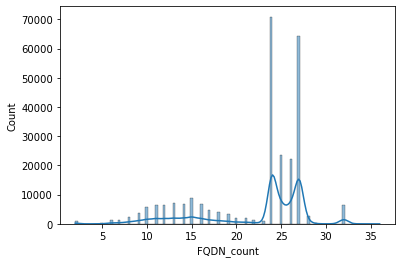

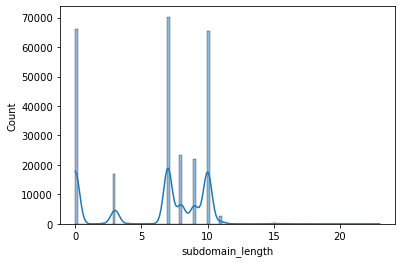

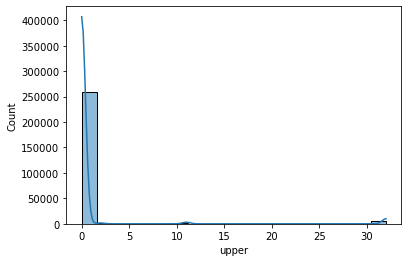

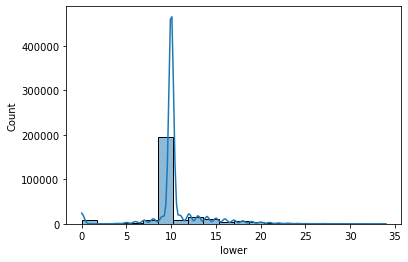

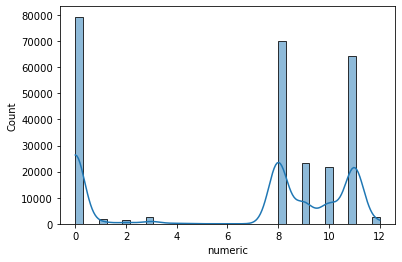

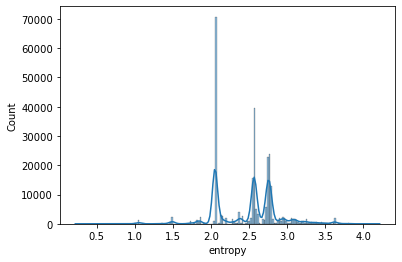

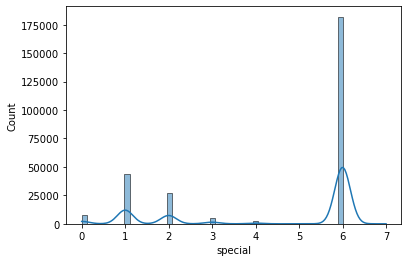

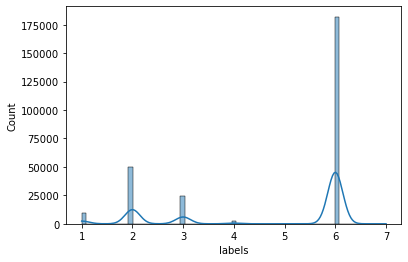

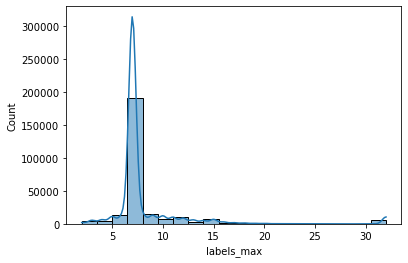

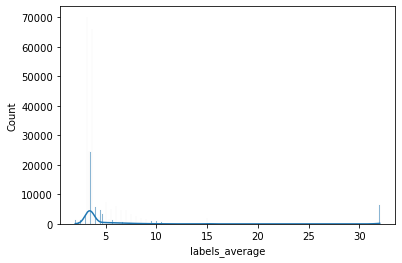

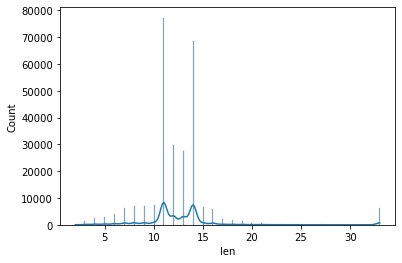

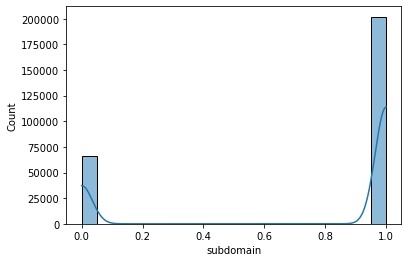

In [10]:
#check for skewness graphically
for i in range(12):
    sns.histplot(x= num_data.iloc[:,i], data = num_data, kde=True);
    plt.show()

## Distribution of all dataset graphically

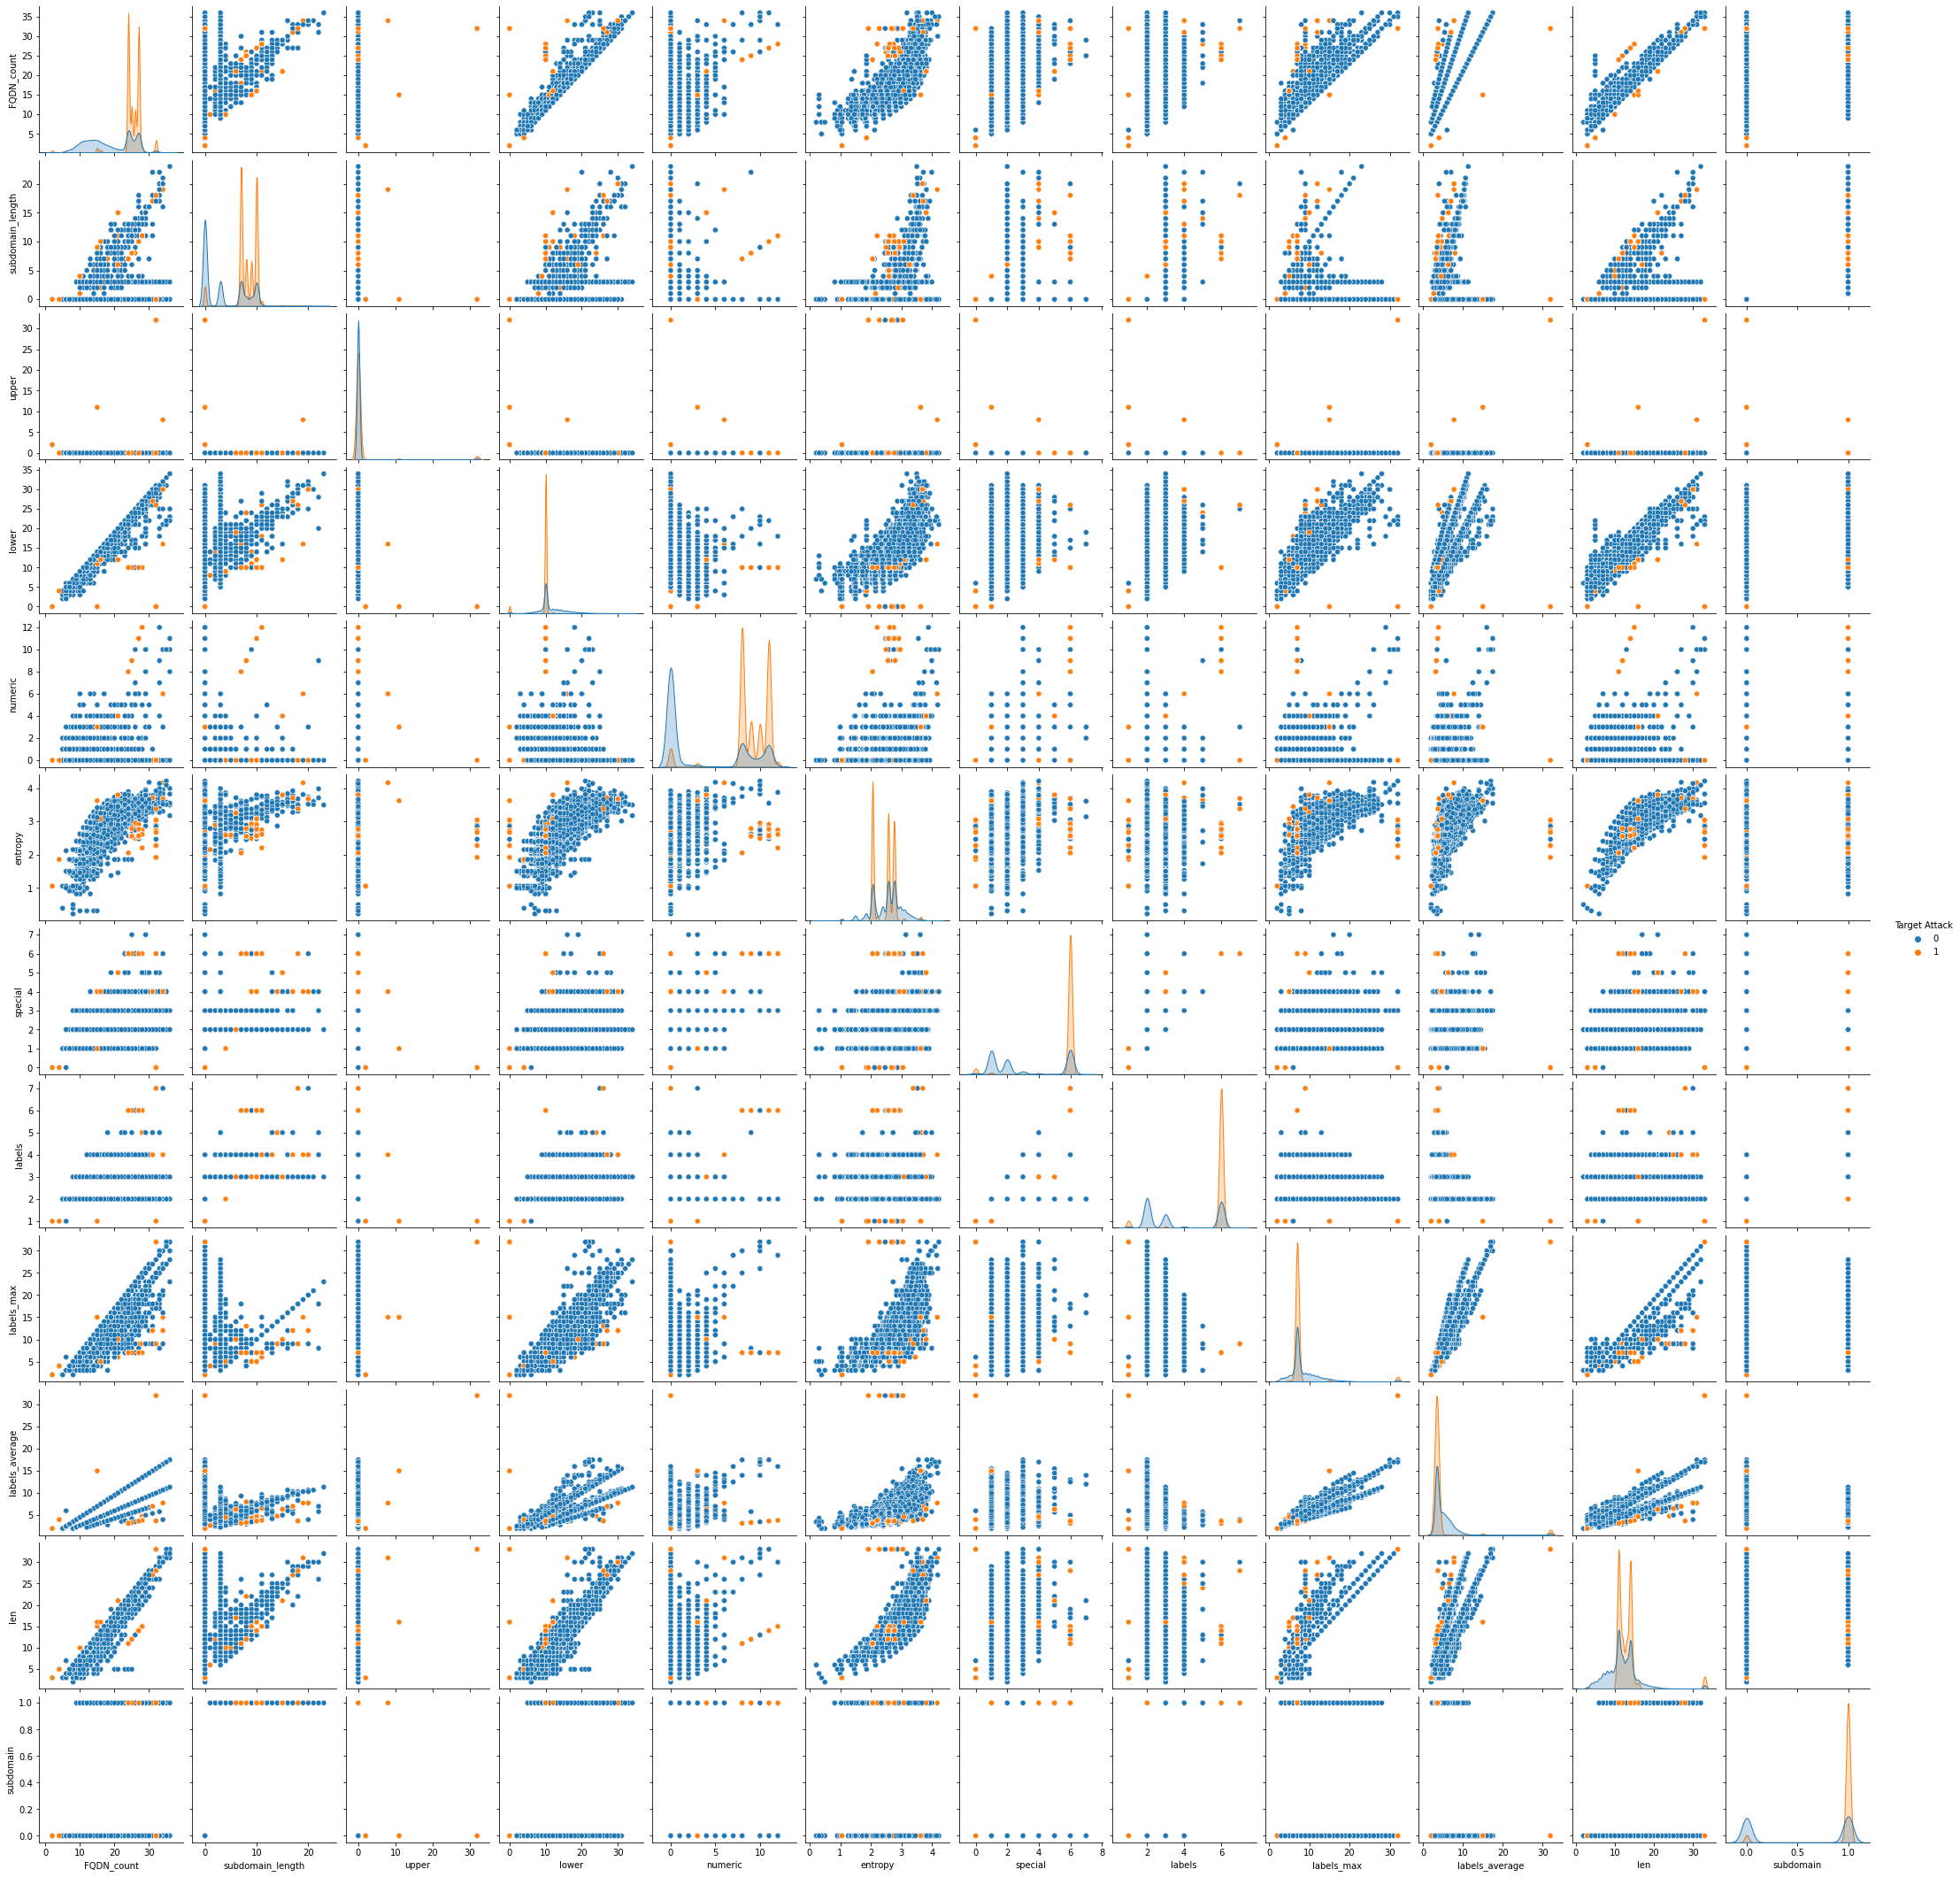

In [11]:
#checking for distribution between all features
sns.pairplot(data= data, hue = 'Target Attack')

## Check if data balanced or inbalanced

In [12]:
#check for balanced data numerically
class_0 = np.where(data['Target Attack']==0)[0]
class_1 = np.where(data['Target Attack']==1)[0]
print(class_0.shape)
print(class_1.shape)

(120895,)
(147179,)


<AxesSubplot:xlabel='Target Attack', ylabel='count'>

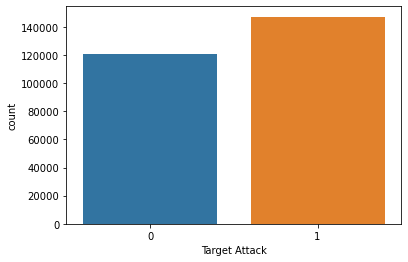

In [13]:
#check for balanced data graphically
sns.countplot(x=data["Target Attack"])

# Feature engineering and data cleaning

## Manipulate the missing values

In [3]:
mode_lw = data['longest_word'].mode()[0]
mode_sld = data['sld'].mode()[0]

In [4]:
data['longest_word'].fillna(mode_lw,inplace = True)

In [5]:
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

## Transform the variables that contain string values

In [6]:
data['longest_word'].value_counts()

2          109989
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [7]:
data['sld'].value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
freesgift                                1
secureserver                             1
airdropalert                             1
queue-it                                 1
lahemal                                  1
Name: sld, Length: 11112, dtype: int64

In [8]:
data['timestamp'].value_counts()

49:26.7    46
49:27.5    43
49:27.1    42
49:27.4    39
49:26.9    35
           ..
07:14.4     1
07:37.6     1
42:38.8     1
06:55.0     1
00:40.7     1
Name: timestamp, Length: 35924, dtype: int64

In [9]:
def hashing(column):
    column = pd.util.hash_pandas_object(column)
    return column
data['sld'] = hashing(data['sld'])
data['longest_word'] = hashing(data['longest_word'])
data.drop('timestamp',axis = 1, inplace = True)
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,12818595333635098865,1436061903013436886,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,17185745172638414508,16487103021445981531,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,17979476933330425403,8782042356081258380,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,8625786489483146881,14213111700542671718,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,6933423371777200487,6933423371777200487,15,1,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        268074 non-null  int64  
 1   subdomain_length  268074 non-null  int64  
 2   upper             268074 non-null  int64  
 3   lower             268074 non-null  int64  
 4   numeric           268074 non-null  int64  
 5   entropy           268074 non-null  float64
 6   special           268074 non-null  int64  
 7   labels            268074 non-null  int64  
 8   labels_max        268074 non-null  int64  
 9   labels_average    268074 non-null  float64
 10  longest_word      268074 non-null  uint64 
 11  sld               268074 non-null  uint64 
 12  len               268074 non-null  int64  
 13  subdomain         268074 non-null  int64  
 14  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64(11), uint64(2)
memory usage: 30.7 MB


# Feature Filteration/ Selection

Splitting the data

In [11]:
#Splliting data into input and output
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
#splitting data into training, testing, and validation
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)

Mutual information

In [13]:
#using Mutual information feature selection
# importances = mutual_info_classif(x_train,y_train)
# feature_importances = pd.Series(importances,data.columns[0:len(data.columns)-1])
# feature_importances.plot(kind = 'barh' ,color = 'teal')

FQDN_count 0.2589715788615108
subdomain_length 0.22638261101913248
upper 0.004350740964121469
lower 0.2505993833815501
numeric 0.22114826458355652
entropy 0.26492219020213215
special 0.28173046076912733
labels 0.286231590623502
labels_max 0.23184771383956848
labels_average 0.2451734998118884
longest_word 0.0
sld 0.0
len 0.15953876020706703
subdomain 0.15232756116739488


D:\APP\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


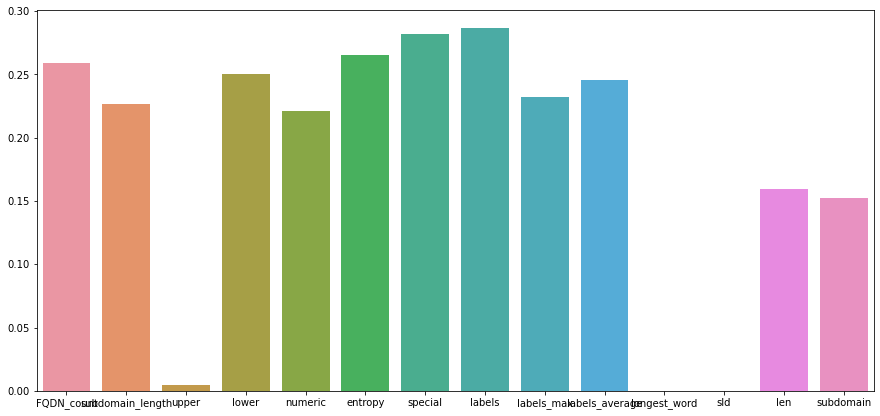

In [14]:
selector = SelectKBest(mutual_info_classif, k = 'all')
x_train_mutual = selector.fit_transform(x_train,y_train)
x_test_mutual = selector.transform(x_test)
for i in range(len(selector.scores_)):
    print(data.columns[i],selector.scores_[i])
# plot the scores
figure(figsize = (15,7))
sns.barplot([i for i in data.columns[:-1]], selector.scores_)
plt.show()

Anova

FQDN_count 99754.51083898984
subdomain_length 104193.85599922179
upper 1167.5105666545307
lower 20533.563086650352
numeric 119846.43695342743
entropy 3003.3105067662113
special 109449.0006150143
labels 102313.19474872155
labels_max 1964.367695348007
labels_average 1245.542766352444
longest_word 0.09034481456184348
sld 0.28241383349771826
len 5682.9219591889705
subdomain 72055.56586999861


D:\APP\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


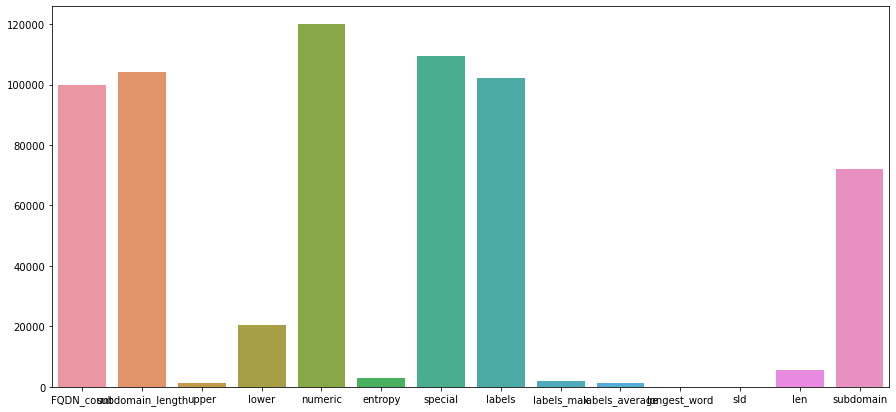

In [15]:
selector = SelectKBest(f_classif, k = 'all')
x_train_anova = selector.fit_transform(x_train,y_train)
x_test_anova = selector.transform(x_test)
for i in range(len(selector.scores_)):
    print(data.columns[i],selector.scores_[i])
# plot the scores
figure(figsize = (15,7))
sns.barplot([i for i in data.columns[:-1]], selector.scores_)
plt.show()

Correlation

D:\APP\Anaconda\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

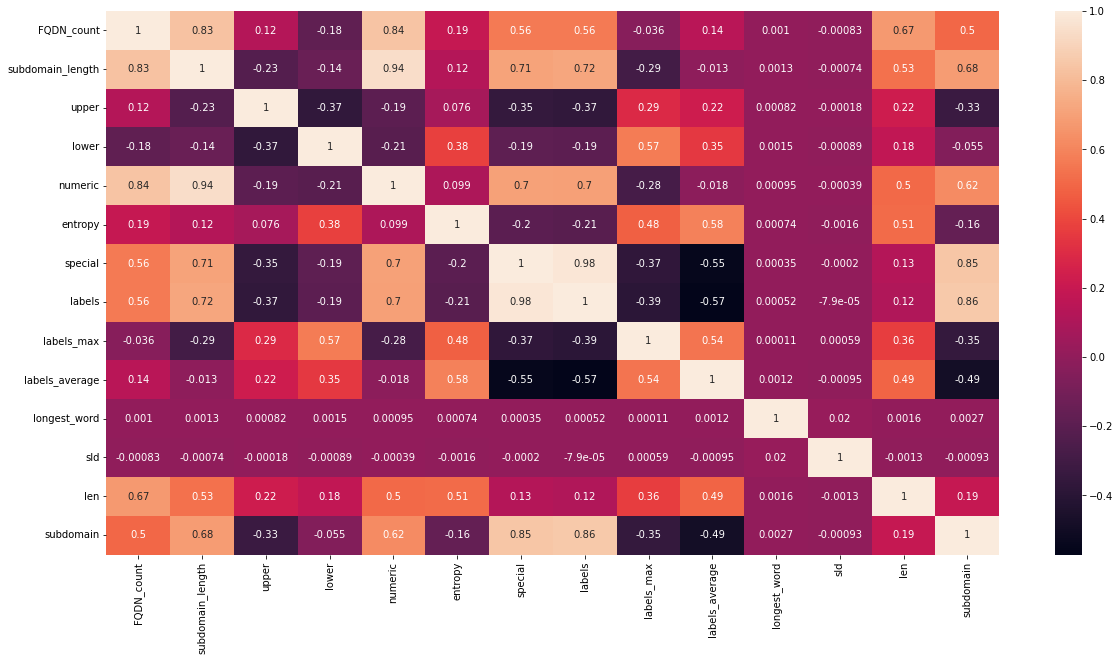

In [16]:
#correlation
x_val_ = pd.DataFrame(x_train, columns = ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'entropy', 'special', 'labels', 'labels_max', 'labels_average',
       'longest_word', 'sld', 'len', 'subdomain'])
corr = x_val_.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

Select features

In [17]:
selector = SelectKBest(mutual_info_classif, k = 9)
x_train_mutual = selector.fit_transform(x_train,y_train)
x_test_mutual = selector.transform(x_test)

In [18]:
selector = SelectKBest(f_classif, k = 6)
x_train_anova = selector.fit_transform(x_train,y_train)
x_test_anova = selector.transform(x_test)

In [19]:
def select_best(x1,x2,y1,y2):
    lr = LogisticRegression()
    lr.fit(x1,y1)
    y_pred = lr.predict(x2)
    cr = classification_report(y2,y_pred)
    print(cr)
    cm = confusion_matrix(y2,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
    disp.plot()

D:\APP\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.62      0.76     24116
           1       0.76      1.00      0.86     29499

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.86      0.83      0.82     53615



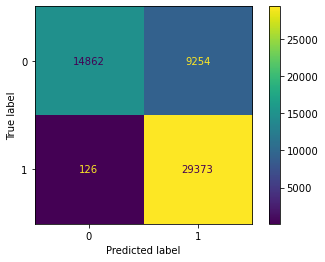

In [20]:
select_best(x_train_mutual,x_test_mutual,y_train,y_test)

              precision    recall  f1-score   support

           0       0.90      0.63      0.74     24116
           1       0.76      0.94      0.84     29499

    accuracy                           0.80     53615
   macro avg       0.83      0.79      0.79     53615
weighted avg       0.82      0.80      0.79     53615



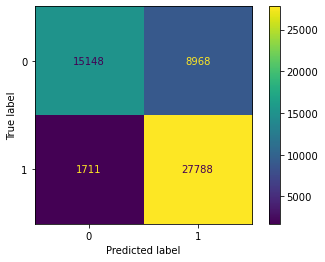

In [21]:
select_best(x_train_anova,x_test_anova,y_train,y_test)

In [22]:
x_train = pd.DataFrame(x_train, columns = data.columns[:-1])
x_test = pd.DataFrame(x_test, columns = data.columns[:-1])
x_train.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,3.166667,2.473861e+18,1.176172e+19,11.0,1.0
1,27.0,10.0,0.0,10.0,11.0,2.767195,6.0,6.0,7.0,3.666667,4.387405e+18,1.169592e+18,14.0,1.0
2,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,3.166667,2.835125e+18,4.747071e+18,11.0,1.0
3,26.0,9.0,0.0,10.0,10.0,2.742338,6.0,6.0,7.0,3.500000,1.349714e+19,1.808100e+19,13.0,1.0
4,26.0,9.0,0.0,10.0,10.0,2.742338,6.0,6.0,7.0,3.500000,1.267012e+19,1.167671e+19,13.0,1.0


In [23]:
x_train.drop(["subdomain","len","sld","longest_word","upper","labels"],axis = 1,inplace = True)
x_test.drop(["subdomain","len","sld","longest_word","upper","labels"],axis = 1,inplace = True)
x_train.columns

Index(['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'entropy',
       'special', 'labels_max', 'labels_average'],
      dtype='object')

In [24]:
x_test.columns

Index(['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'entropy',
       'special', 'labels_max', 'labels_average'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     24116
           1       0.76      1.00      0.86     29499

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.86      0.83      0.82     53615



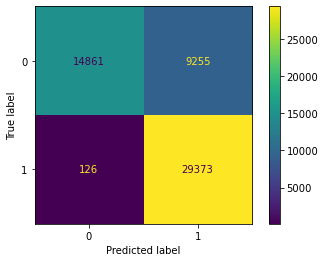

In [25]:
select_best(x_train,x_test,y_train,y_test)

# Model Training

##Normalize the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Decision Tree

In [27]:
DT = DecisionTreeClassifier()
Parameters = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf_dt = GridSearchCV(DT, Parameters, cv=5)
clf_dt.fit(x_train, y_train)
y_pred_dt = clf_dt.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24116
           1       0.76      1.00      0.86     29499

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



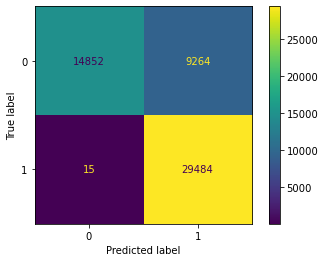

In [28]:
cr = classification_report(y_test,y_pred_dt)
cm = confusion_matrix(y_test,y_pred_dt)
print(cr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=clf_dt.classes_ )
disp.plot()

In [29]:
clf_dt.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [40]:
recall_DT = []
kf = KFold(n_splits = 5,shuffle=True, random_state = 42)
for train_idx, val_idx in kf.split(x_train):
    x_train_= x_train[train_idx]
    x_val = x_train[val_idx]
    y_train_= y_train[train_idx]
    y_val = y_train[val_idx]
    DT = DecisionTreeClassifier(criterion='gini', max_depth = 50)
    DT.fit(x_train_,y_train_)
    y_pred_DT = DT.predict(x_val)
    recall_DT.append(recall_score(y_val,y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24116
           1       0.76      1.00      0.86     29499

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



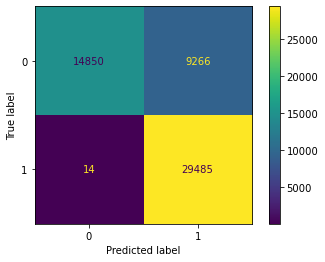

In [41]:
y_pred = DT.predict(x_test)
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=DT.classes_ )
disp.plot()

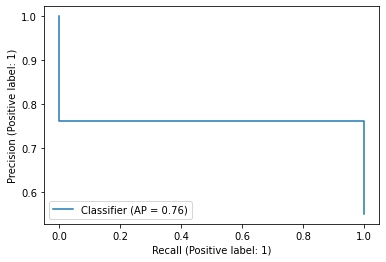

In [42]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)

## Random forest

In [32]:
RF = RandomForestClassifier(random_state=42)
Parameters = param_grid = { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
clf_RF = GridSearchCV(RF, Parameters, cv=5)
clf_RF.fit(x_train, y_train)
y_pred_RF = clf_RF.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24116
           1       0.76      1.00      0.86     29499

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



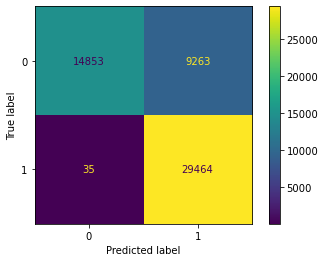

In [33]:
cr = classification_report(y_test,y_pred_RF)
cm = confusion_matrix(y_test,y_pred_RF)
print(cr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=clf_RF.classes_ )
disp.plot()

In [34]:
clf_RF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [35]:
recall_RF = []
kf = KFold(n_splits = 5,shuffle=True, random_state = 42)
for train_idx, val_idx in kf.split(x_train):
    x_train_= x_train[train_idx]
    x_val = x_train[val_idx]
    y_train_= y_train[train_idx]
    y_val = y_train[val_idx]
    RF = RandomForestClassifier(n_estimators=200, criterion='entropy',max_depth = 8,max_features = 'log2',random_state=42)
    RF.fit(x_train_,y_train_)
    y_pred_RF = RF.predict(x_val)
    recall_RF.append(recall_score(y_val,y_pred_RF))

In [36]:
recall_RF

[0.9985947281011796,
 0.9991473396998636,
 0.9992370941764855,
 0.9987269795468047,
 0.9987701963445147]

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     24116
           1       0.76      1.00      0.86     29499

    accuracy                           0.83     53615
   macro avg       0.88      0.81      0.81     53615
weighted avg       0.87      0.83      0.82     53615



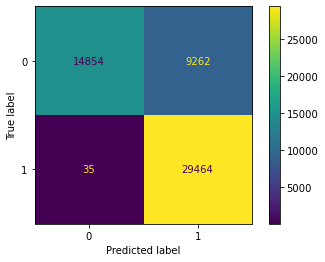

In [37]:
y_pred = RF.predict(x_test)
cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=RF.classes_ )
disp.plot()

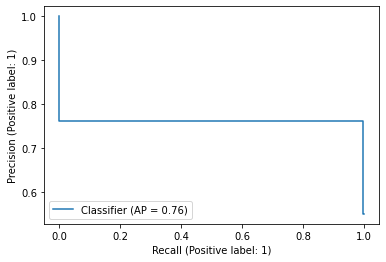

In [39]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)

# Saving model

In [50]:
pickle.dump(DT, open('Static.pkl', 'wb'))